In [2]:
import sys
import os
import numpy as np
from math import *
import h5py
sys.path.append(os.path.join(os.path.dirname("__file__"), "/home/henhans/WIEN_GUTZ/bin/tools/Gutzwiller"))
from dataproc import get_csr_matrix
from my_impurity_analysis import *
np.set_printoptions(precision=5, suppress=True)
from get_dos import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

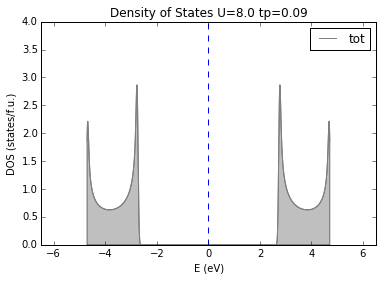

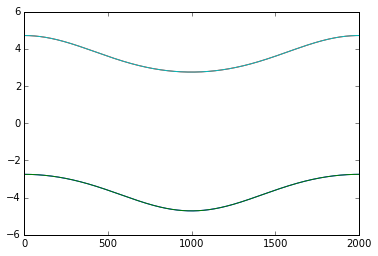

E_tot= -0.127648095697
error= 2.57257970482e-08
E_F= 3.99999582792
ntot= (1.99999999948+2.50366879555e-51j)
R=
[[ 0.46984-0.48564j -0.48603-0.47194j  0.00000+0.j       0.00000+0.j     ]
 [ 0.18572+0.01318j  0.00809-0.17957j  0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j       0.46984-0.48564j -0.48603-0.47194j]
 [ 0.00000+0.j       0.00000+0.j       0.18572+0.01318j  0.00809-0.17957j]]
Z=
[[ 0.49126+0.j      -0.00002-0.49123j  0.00000+0.j       0.00000+0.j     ]
 [-0.00002+0.49123j  0.49126+0.j       0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j       0.49126+0.j      -0.00002-0.49123j]
 [ 0.00000+0.j       0.00000+0.j      -0.00002+0.49123j  0.49126+0.j     ]]
Lambda=
[[ 2.92835+0.j       3.39897-0.50581j  0.00000+0.j       0.00000+0.j     ]
 [ 3.39897+0.50581j  5.07164+0.j       0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j       2.92835+0.j       3.39897-0.50581j]
 [ 0.00000+0.j       0.00000+0.j       3.39897+0.50

In [3]:
U=8.0
tp=0.09
filename = "glogbandU"+str(U)+"tp"+str(tp)+".h5"
get_dos(filename,U,tp,True)

f = h5py.File(filename,'r')
kps = np.linspace(-pi,pi,1000)
bnd_ek = f["/BND_EK"][0]
EF = f["/E_FERMI"][0]
#print bnd_ek
plt.plot(bnd_ek-EF)
plt.show()

print "E_tot=", f["/E_TB_TOT"][0]

print "error=",f["/GA_MAX_ERR"][0]
print "E_F=",EF
print "ntot=",get_n11_dimer_bilayer(filename) + get_n22_dimer_bilayer(filename)
R = f["Impurity_1/GA_R"][...].T
print "R="
print R
Z = np.dot(np.conj(R).T,R)

print "Z="
print Z

print "Lambda="
lam = f["Impurity_1/GA_La"][...]
print lam

print "n11=",get_n11_dimer_bilayer(filename)
print "n22=",get_n22_dimer_bilayer(filename)
print "n1up=",get_n1up_dimer_bilayer(filename)
print "n1dn=",get_n1dn_dimer_bilayer(filename)
print "n2up=",get_n2up_dimer_bilayer(filename)
print "n2dn=",get_n2dn_dimer_bilayer(filename)

#print "D="
#print f["Impurity_1/GA_D"][...]
#print "Lambda_c="
#print f["Impurity_1/GA_Lc"][...]

f.close()

In [29]:
from scipy import *

print "Lambda eigenvalues="
print eigvals(lam[:,:])
u = eigh(lam[:,:])[1]

print "Lambda diagonalize="
print np.dot( np.conj(u).T, np.dot( lam, u ) )

print "Transformed R="
print np.dot( np.conj(u).T, R )

print "u="
print u

print np.dot( np.conj(np.dot( np.conj(u).T, R )).T, np.dot( np.conj(u).T, R ) )

Lambda eigenvalues=
[-0.67492+0.j  8.67492-0.j -0.67492+0.j  8.67492-0.j]
Lambda diagonalize=
[[-0.67492+0.j  0.00000+0.j  0.00000+0.j  0.00000-0.j]
 [ 0.00000+0.j -0.67492+0.j  0.00000-0.j  0.00000+0.j]
 [ 0.00000+0.j  0.00000+0.j  8.67492+0.j  0.00000+0.j]
 [ 0.00000+0.j  0.00000+0.j  0.00000+0.j  8.67492+0.j]]
Transformed R=
[[-0.38001+0.36317j  0.47955+0.0178j   0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j      -0.38001+0.36317j  0.47955+0.0178j ]
 [ 0.00000+0.j       0.00000+0.j      -0.28622+0.42309j  0.16685+0.52831j]
 [-0.28622+0.42309j  0.16685+0.52831j  0.00000+0.j       0.00000+0.j     ]]
u=
[[-0.80578+0.j      -0.00000+0.j       0.00000+0.j      -0.59222+0.j     ]
 [ 0.59038+0.04672j -0.00000+0.j       0.00000+0.j      -0.80326-0.06356j]
 [-0.00000+0.j      -0.80578+0.j      -0.59222+0.j       0.00000+0.j     ]
 [-0.00000+0.j       0.59038+0.04672j -0.80326-0.06356j  0.00000+0.j     ]]
[[ 0.53724+0.j       0.00000-0.40273j  0.00000+0.j       0.00000+

In [51]:
# Calculating and print density matrix
from scipy.sparse import csr_matrix
from dataproc import get_csr_matrix, get_ed_lowest_vec, trace_single_state

filename = "glogbandU"+str(U)+"tp"+str(tp)+".h5"
f = h5py.File(filename, 'r')

rho = get_csr_matrix(f, "/Impurity_1/RHO")
density_matrix = zeros((4,4),dtype=complex)
for i in range(4):
    for j in range(4):
        ci = get_csr_matrix(f, "/Impurity_1/annihi.op._" + str(i+1))
        cj = get_csr_matrix(f, "/Impurity_1/annihi.op._" + str(j+1))
        ci_dagger_cj = ci.getH() * cj
        density_matrix[i,j] = np.sum((rho * ci_dagger_cj).diagonal())
print density_matrix

[[ 0.50000-0.j -0.20731+0.j -0.00000+0.j  0.00000-0.j]
 [-0.20731-0.j  0.50000-0.j -0.00000+0.j  0.00000-0.j]
 [-0.00000-0.j -0.00000-0.j  0.50000-0.j -0.20731+0.j]
 [ 0.00000+0.j  0.00000+0.j -0.20731-0.j  0.50000-0.j]]
